In [1]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('최종전처리본(정규화 이전본)')

In [3]:
df

,Datetime,lon,lat,uv,band1,band2,band3,band4,band5,band6,...,증기압(hPa),이슬점온도(°C),해면기압(hPa),전운량(10분위),중하층운량(10분위),지면온도(°C),solaraa,해발고도,풍향_cos,풍향_sin
0,2020-01-01 00:00:00,126.16000,33.30000,0.0,0.00000,0.00000,0.00000,-0.00075,0.0000,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-75.17963,71,1.000000,-4.898587e-15
1,2020-01-01 00:10:00,126.16000,33.30000,0.0,-0.00057,0.00000,0.00119,-0.00015,-0.0003,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-76.67178,71,1.000000,-4.898587e-15
2,2020-01-01 00:20:00,126.16000,33.30000,0.0,0.00000,0.00000,-0.00030,0.00030,0.0000,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-77.94722,71,1.000000,-4.898587e-15
3,2020-01-01 00:30:00,126.16000,33.30000,0.0,-0.00057,0.00000,-0.00030,0.00030,-0.0006,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-78.93011,71,1.000000,-4.898587e-15
4,2020-01-01 00:40:00,126.16000,33.30000,0.0,-0.00113,-0.00057,-0.00119,-0.00030,-0.0003,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-79.53722,71,1.000000,-4.898587e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578955,2021-12-31 23:10:00,126.38121,34.81689,0.0,-0.00057,0.00000,-0.00089,-0.00015,-0.0003,-0.00065,...,3.3,-8.0,1032.8,6.0,5.0,-0.8,-65.69170,45,0.173648,-9.848078e-01
1578956,2021-12-31 23:20:00,126.38121,34.81689,0.0,0.00000,0.00000,-0.00149,0.00015,0.0000,-0.00065,...,3.3,-8.0,1032.8,6.0,5.0,-0.8,-67.56294,45,0.173648,-9.848078e-01
1578957,2021-12-31 23:30:00,126.38121,34.81689,0.0,0.00000,0.00000,0.00000,0.00030,-0.0003,0.00000,...,3.3,-8.0,1032.8,6.0,5.0,-0.8,-69.37752,45,0.173648,-9.848078e-01
1578958,2021-12-31 23:40:00,126.38121,34.81689,0.0,-0.00057,0.00000,-0.00030,-0.00030,-0.0003,0.00000,...,3.3,-8.0,1032.8,6.0,5.0,-0.8,-71.11812,45,0.173648,-9.848078e-01


In [4]:
stn_index = df['lon'].value_counts().index
stn_index

Float64Index([   126.16, 128.89098,   126.965,  126.6249, 130.89864, 127.44066,
                 126.33, 127.37212, 129.37962, 128.65295,   127.119, 129.33472,
              126.89158, 129.03203, 126.38121],
             dtype='float64')

In [5]:
df_stn = [0]*15
for i in range(15):
    df_stn[i] = df.groupby('lon').get_group(stn_index[i])

In [6]:
df_stn[0]

,Datetime,lon,lat,uv,band1,band2,band3,band4,band5,band6,...,증기압(hPa),이슬점온도(°C),해면기압(hPa),전운량(10분위),중하층운량(10분위),지면온도(°C),solaraa,해발고도,풍향_cos,풍향_sin
0,2020-01-01 00:00:00,126.16,33.3,0.0,0.00000,0.00000,0.00000,-0.00075,0.0000,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-75.17963,71,1.0,-4.898587e-15
1,2020-01-01 00:10:00,126.16,33.3,0.0,-0.00057,0.00000,0.00119,-0.00015,-0.0003,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-76.67178,71,1.0,-4.898587e-15
2,2020-01-01 00:20:00,126.16,33.3,0.0,0.00000,0.00000,-0.00030,0.00030,0.0000,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-77.94722,71,1.0,-4.898587e-15
3,2020-01-01 00:30:00,126.16,33.3,0.0,-0.00057,0.00000,-0.00030,0.00030,-0.0006,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-78.93011,71,1.0,-4.898587e-15
4,2020-01-01 00:40:00,126.16,33.3,0.0,-0.00113,-0.00057,-0.00119,-0.00030,-0.0003,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-79.53722,71,1.0,-4.898587e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105259,2021-12-31 23:10:00,126.16,33.3,0.0,-0.00113,0.00057,0.00000,0.00000,0.0000,0.00000,...,5.5,-1.4,1031.7,9.0,9.0,4.5,-66.05597,71,1.0,-4.898587e-15
105260,2021-12-31 23:20:00,126.16,33.3,0.0,0.00000,-0.00057,-0.00060,-0.00105,0.0000,0.00000,...,5.5,-1.4,1031.7,9.0,9.0,4.5,-68.01080,71,1.0,-4.898587e-15
105261,2021-12-31 23:30:00,126.16,33.3,0.0,-0.00057,-0.00057,0.00089,-0.00015,-0.0003,-0.00065,...,5.5,-1.4,1031.7,9.0,9.0,4.5,-69.91946,71,1.0,-4.898587e-15
105262,2021-12-31 23:40:00,126.16,33.3,0.0,-0.00057,-0.00057,0.00030,-0.00015,0.0000,0.00000,...,5.5,-1.4,1031.7,9.0,9.0,4.5,-71.76646,71,1.0,-4.898587e-15


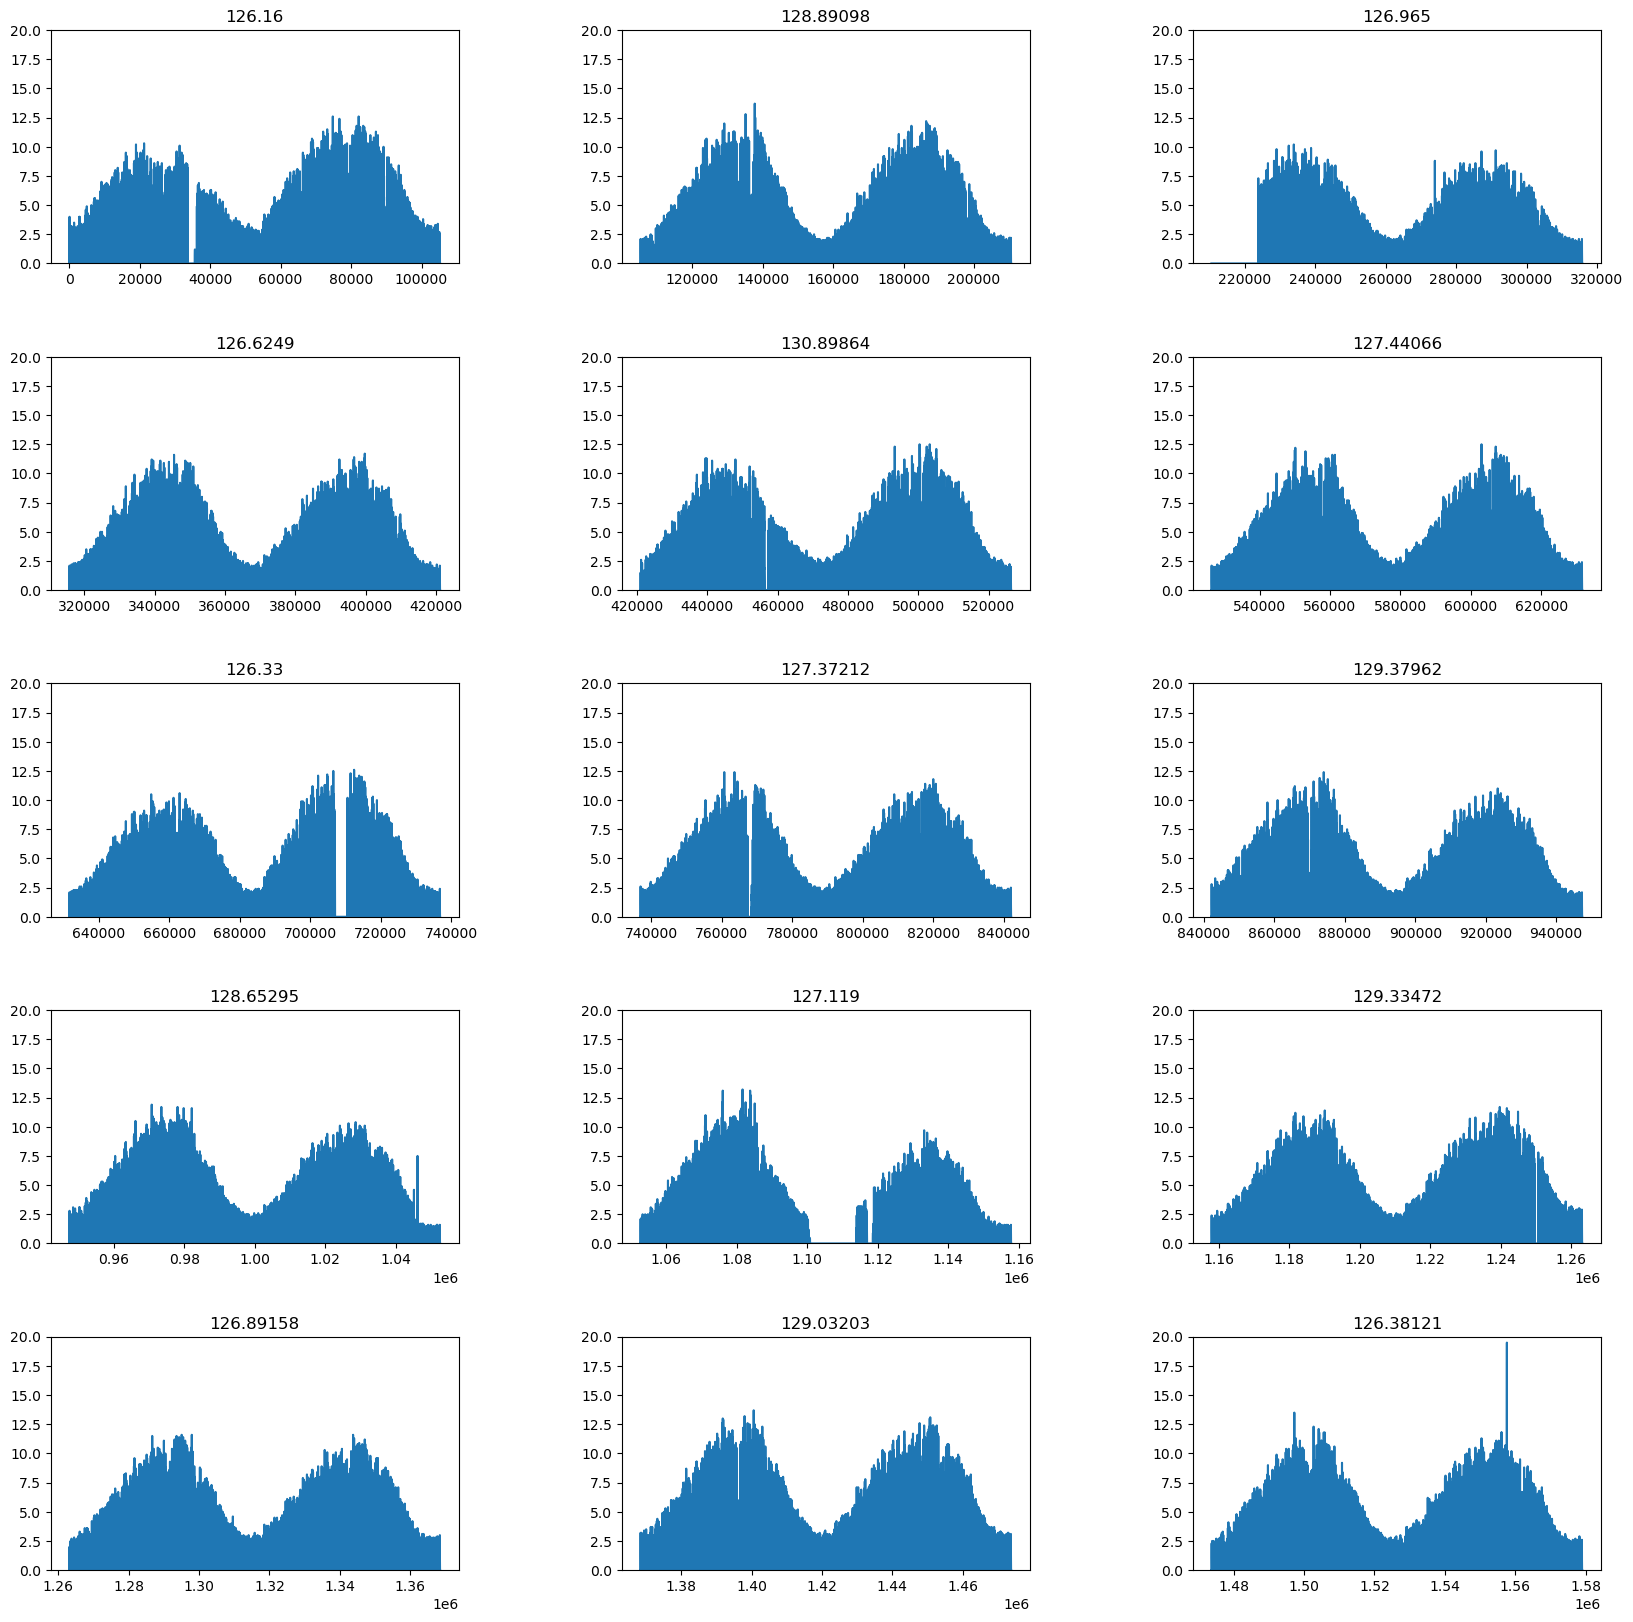

In [7]:
gp = plt.figure(figsize=(20,20))  # figure 생성
gp.subplots_adjust(wspace=0.4, hspace=0.4)  # figure 설정
    
for i in range(1,16):
    ax = gp.add_subplot(5, 3, i)
    ax.set_title(f'{df_stn[i-1].iloc[1,1]}')
    plt.plot(df_stn[i-1]['uv'])
    plt.ylim(0, 20)

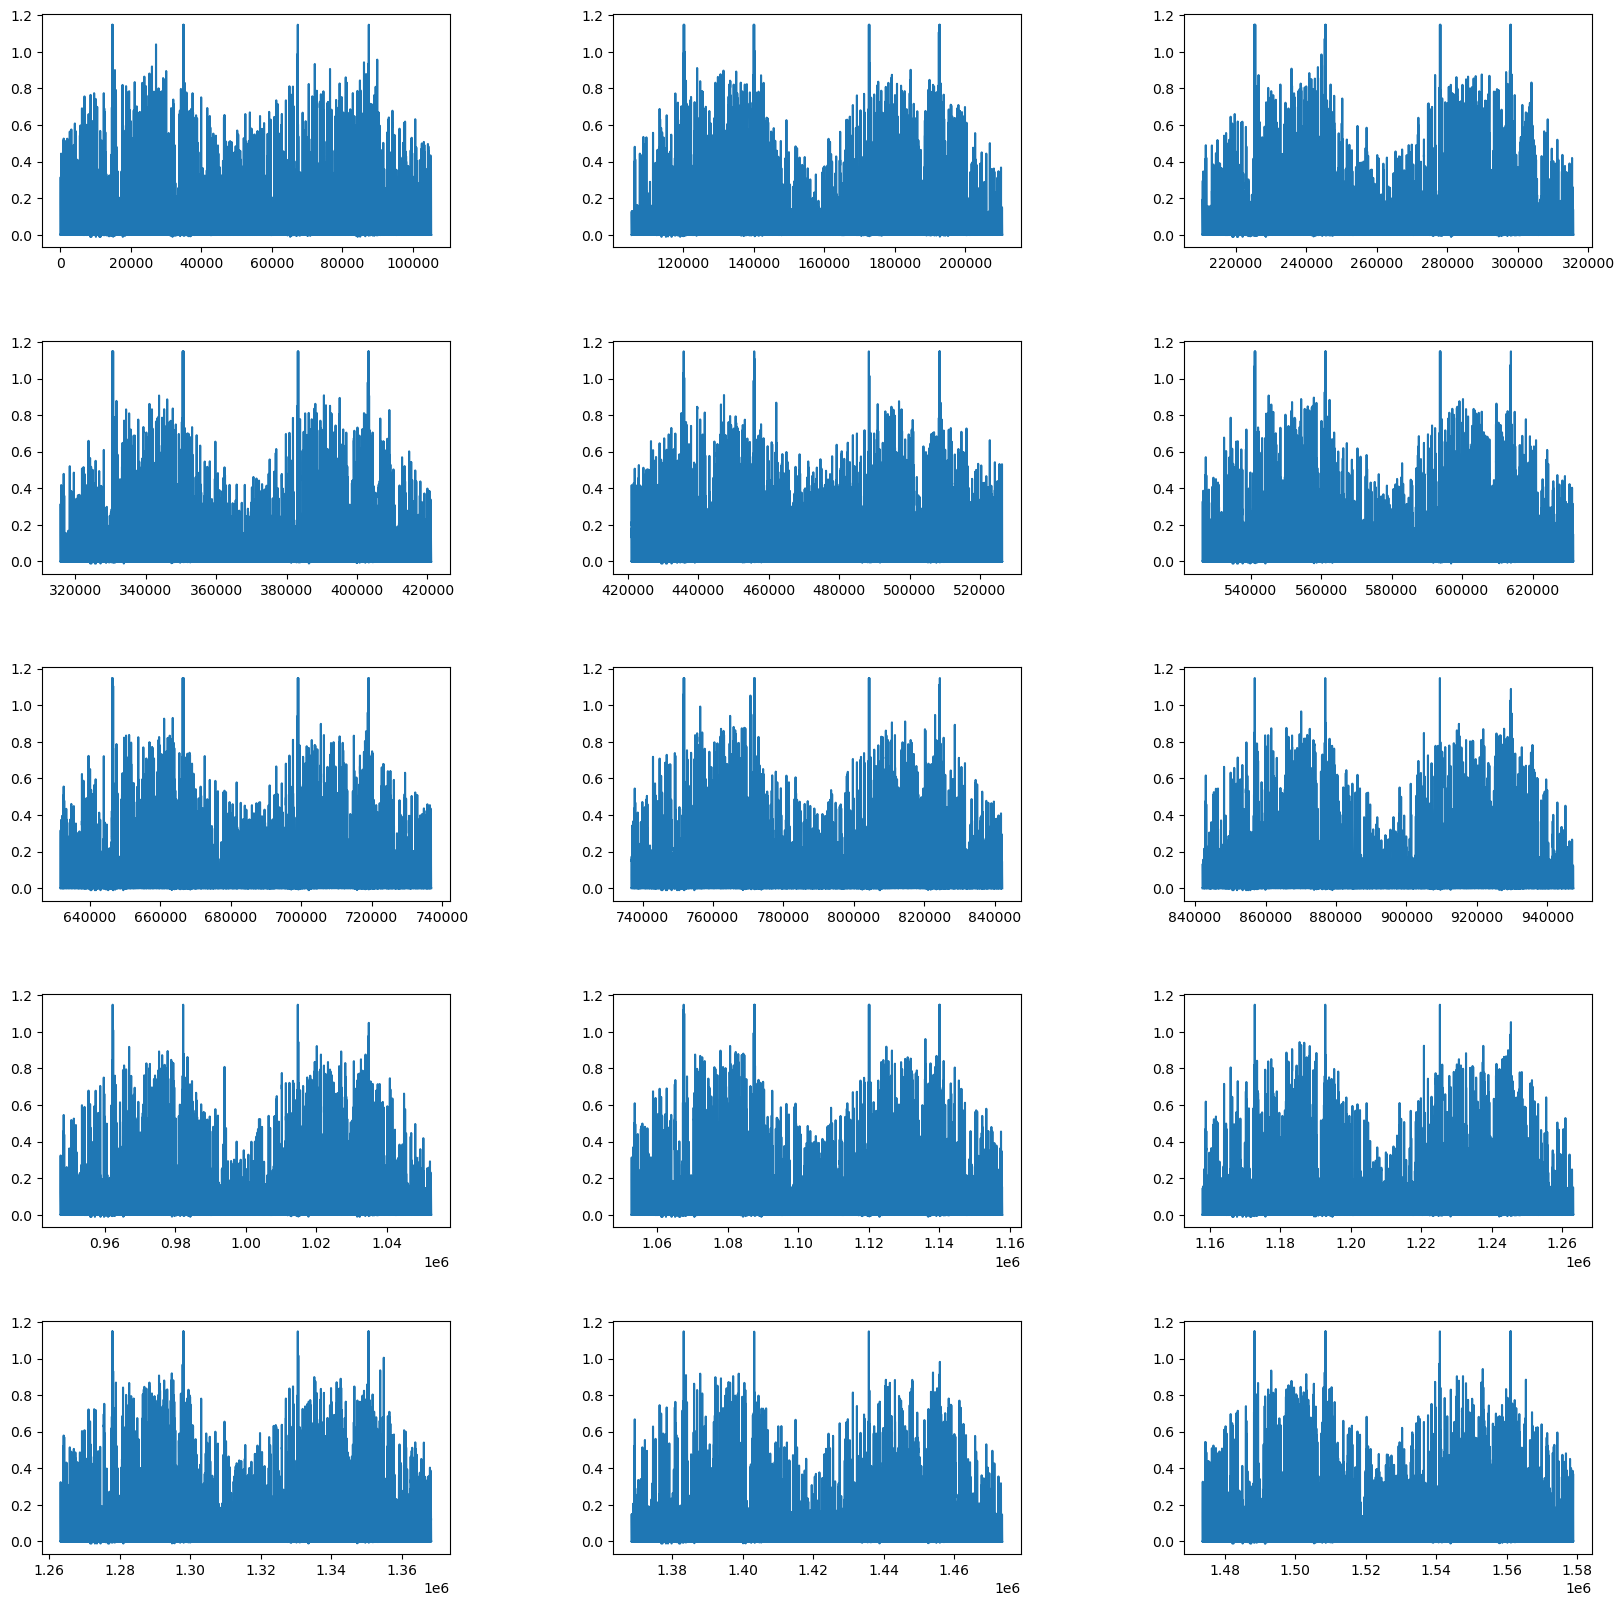

In [8]:
gp = plt.figure(figsize=(20,20))  # figure 생성
gp.subplots_adjust(wspace=0.4, hspace=0.4)  # figure 설정
    
for i in range(1,16):
    ax = gp.add_subplot(5, 3, i)
    plt.plot(df_stn[i-1]['band1'])

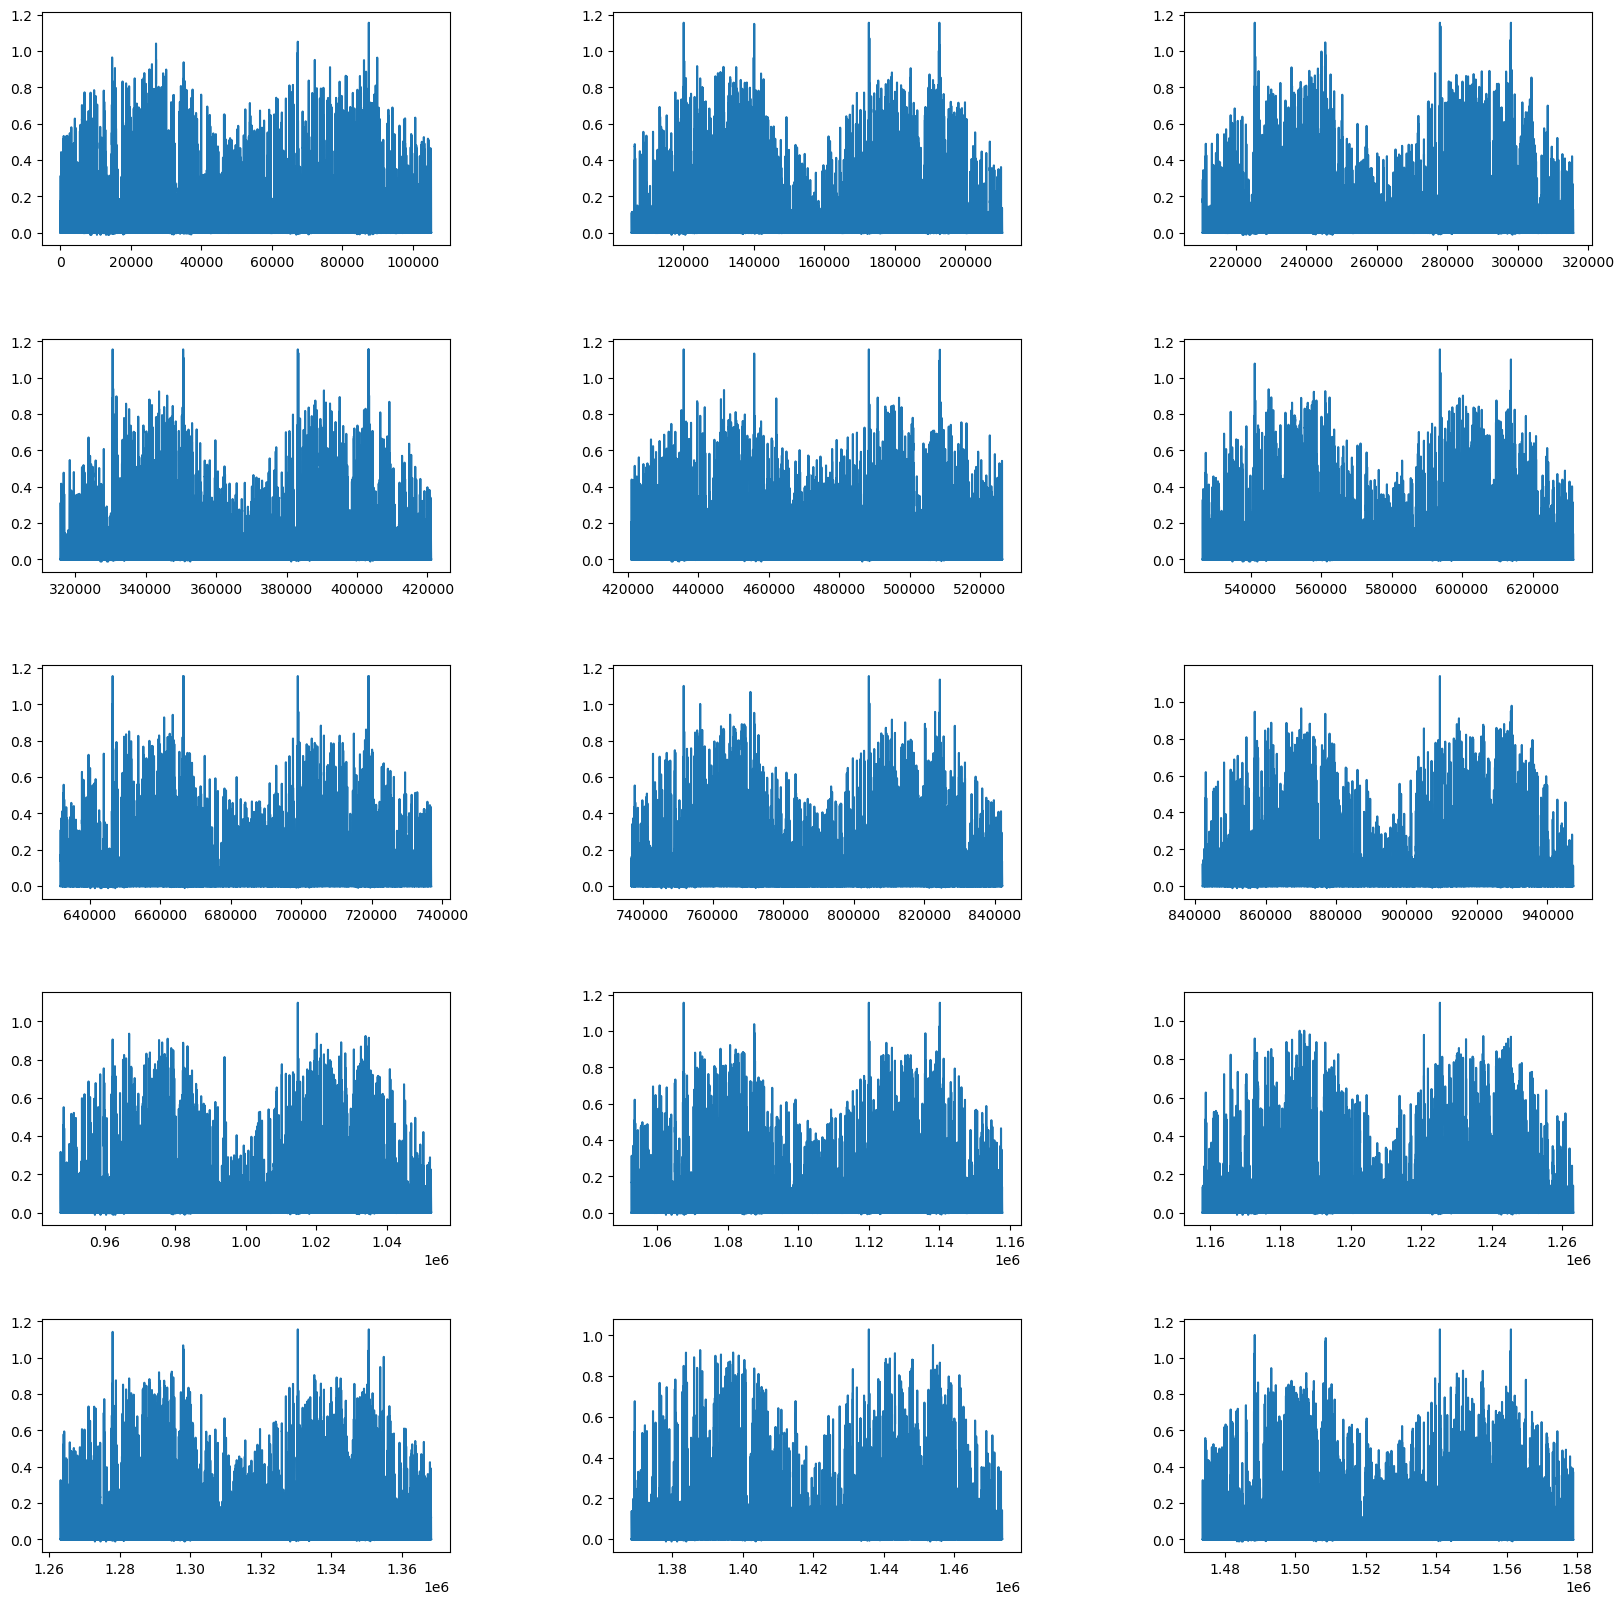

In [9]:
gp = plt.figure(figsize=(20,20))  # figure 생성
gp.subplots_adjust(wspace=0.4, hspace=0.4)  # figure 설정
    
for i in range(1,16):
    ax = gp.add_subplot(5, 3, i)
    plt.plot(df_stn[i-1]['band2'])

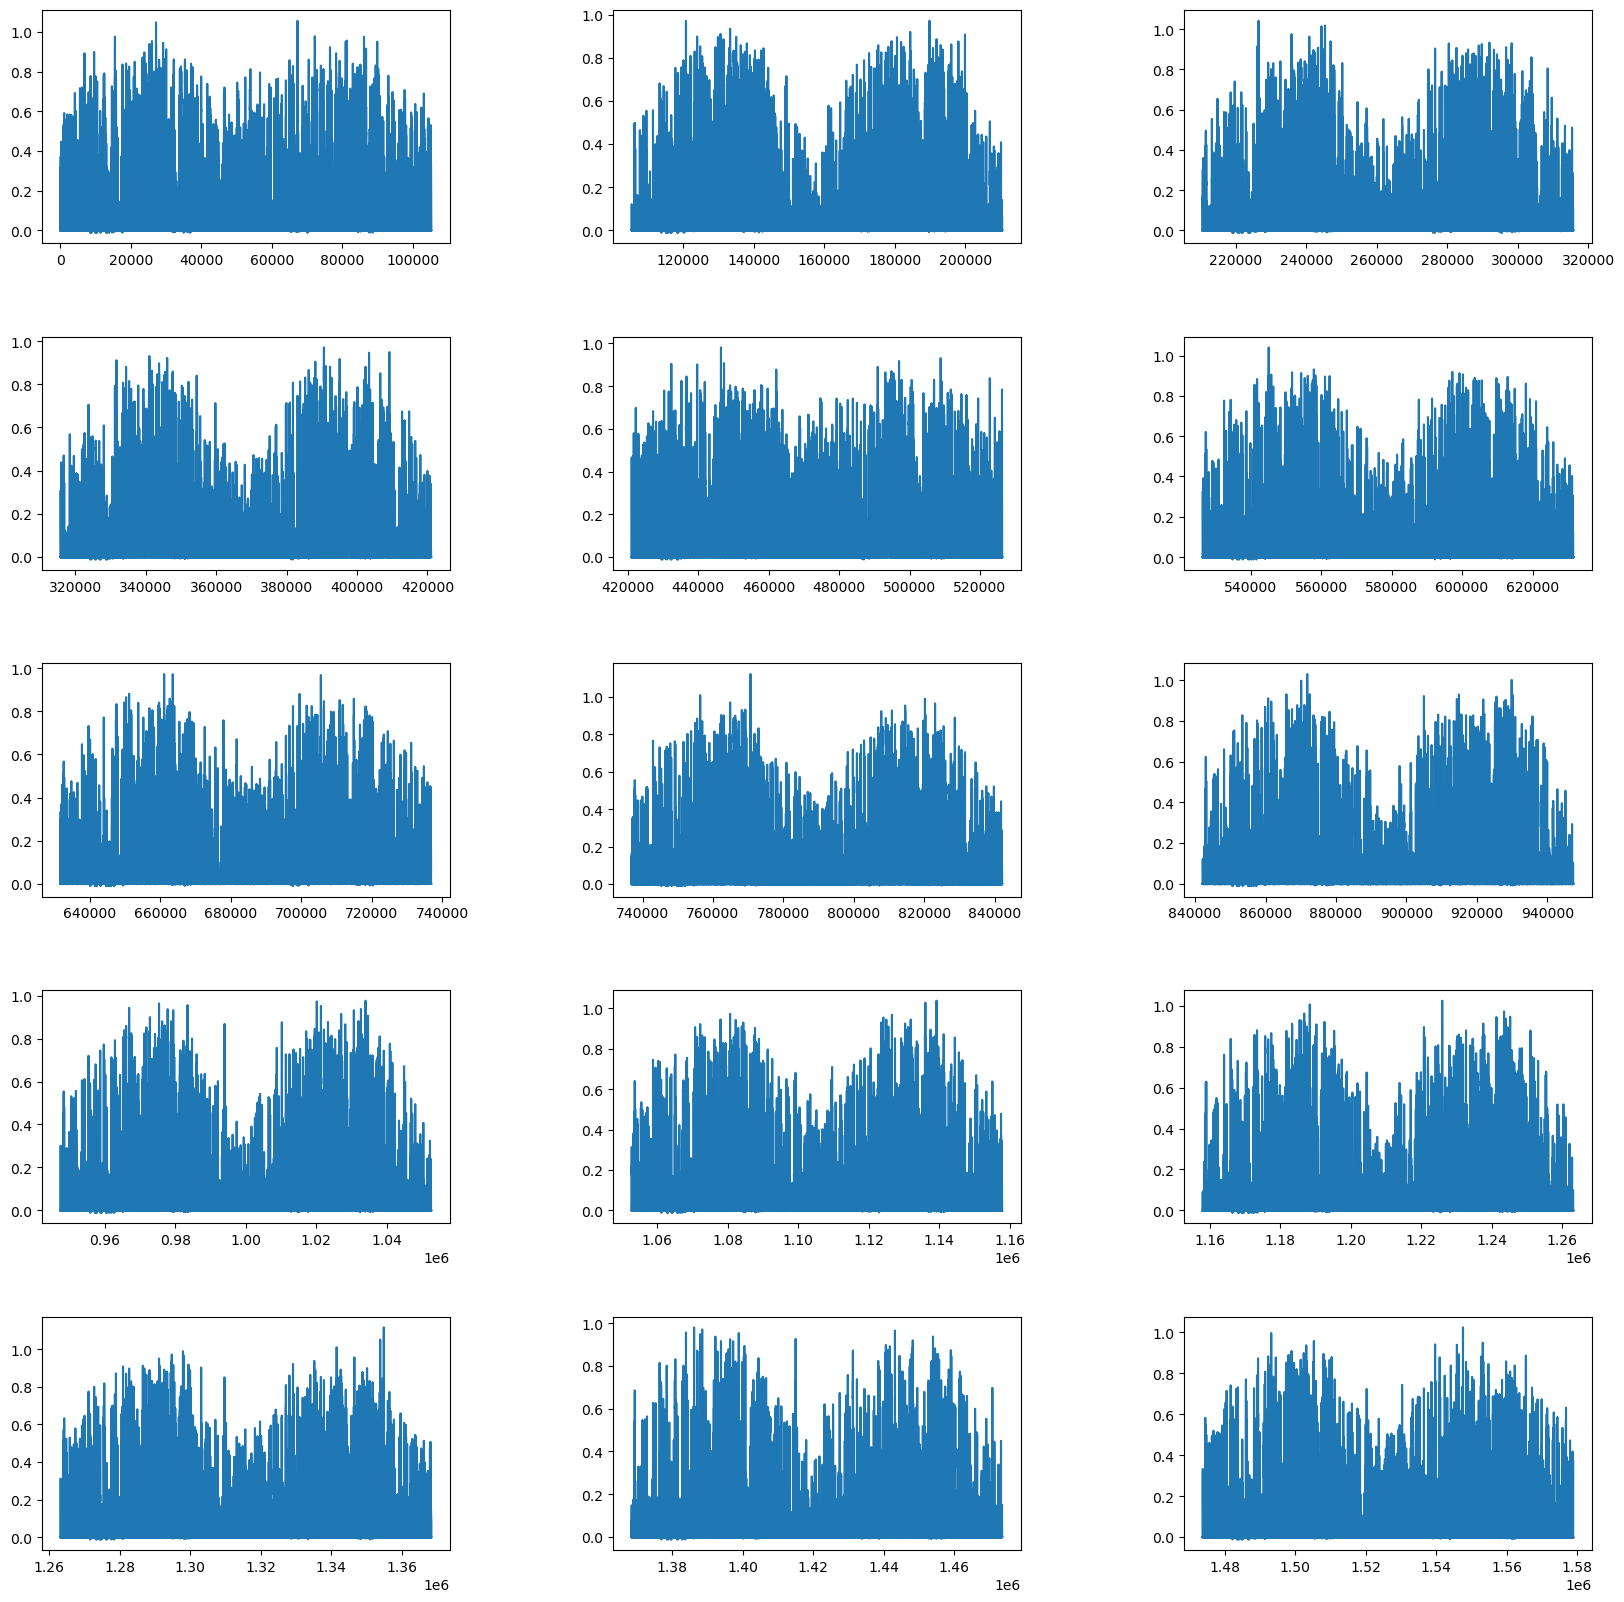

In [10]:
gp = plt.figure(figsize=(20,20))  # figure 생성
gp.subplots_adjust(wspace=0.4, hspace=0.4)  # figure 설정
    
for i in range(1,16):
    ax = gp.add_subplot(5, 3, i)
    plt.plot(df_stn[i-1]['band3'])

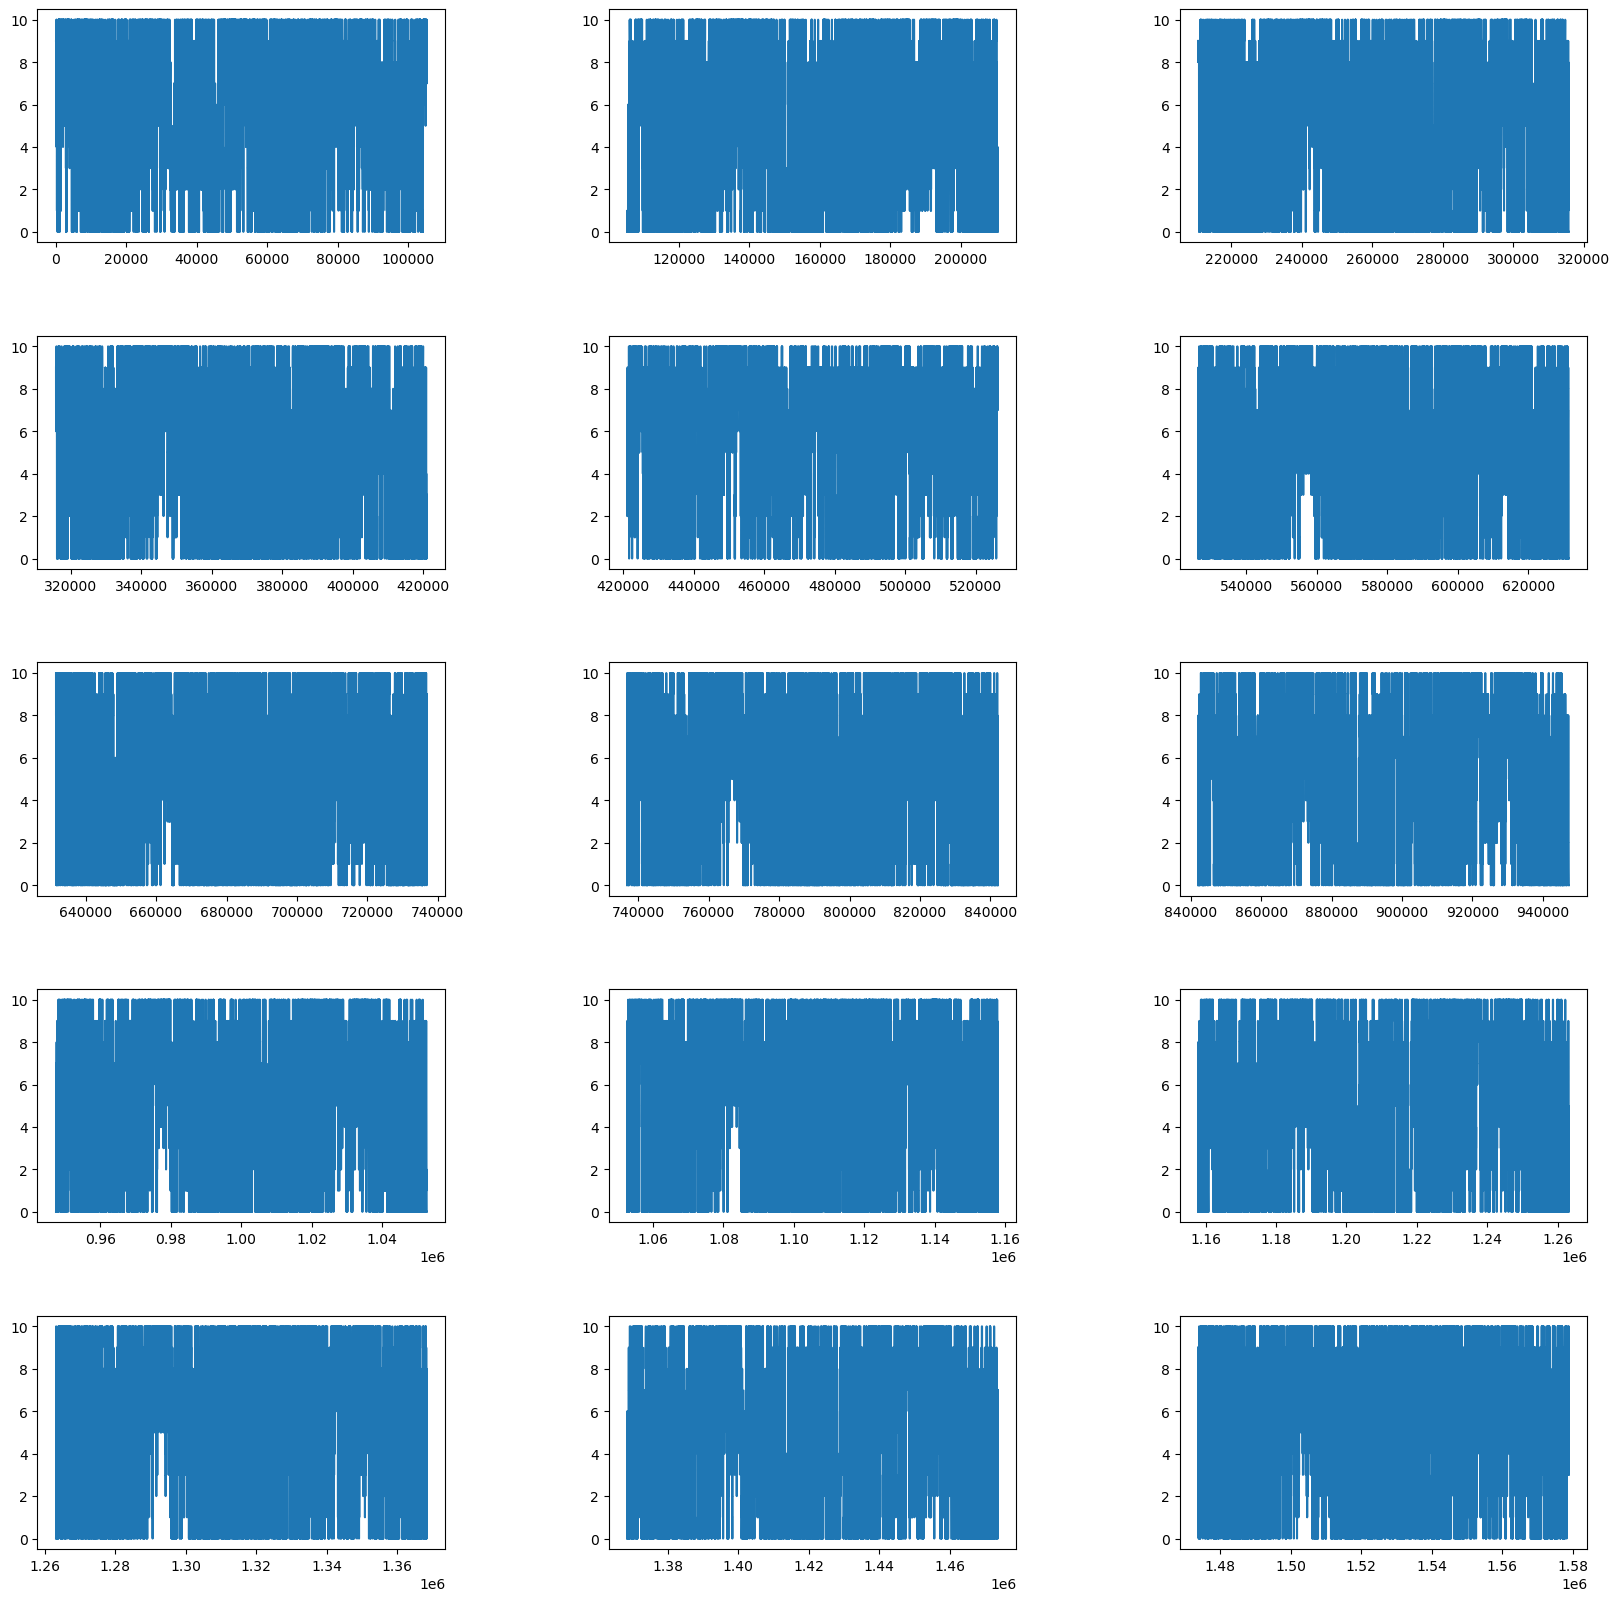

In [11]:
gp = plt.figure(figsize=(20,20))  # figure 생성
gp.subplots_adjust(wspace=0.4, hspace=0.4)  # figure 설정
    
for i in range(1,16):
    ax = gp.add_subplot(5, 3, i)
    plt.plot(df_stn[i-1]['전운량(10분위)'])

In [12]:
dff = pd.read_csv('결측처리데이터/stn_all.csv')

In [13]:
dff

,Unnamed: 0,Datetime,Date,Time,stn,lon,lat,uv,band1,band2,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,0,2020-01-01 00:00:00,20200101,0,13,126.16000,33.30000,0.0,0.00000,0.00000,...,250.75924,269.97608,269.70811,268.61702,259.10334,165.17963,38.96359,-9.50910,71.00,0
1,0,2020-01-01 00:00:00,20200101,0,165,126.38121,34.81689,0.0,0.00000,0.00000,...,246.81037,264.84497,264.41440,263.14810,255.27793,164.27585,40.67788,-9.46744,38.00,3
2,0,2020-01-01 00:00:00,20200101,0,159,129.03203,35.10468,0.0,-0.00057,-0.00057,...,251.55840,273.80950,273.80042,273.72736,261.02336,165.46158,40.96396,-9.51364,69.56,3
3,0,2020-01-01 0:00,20200101,0,108,126.96500,37.57100,0.0,0.00000,0.00000,...,241.24994,258.33982,258.18692,257.58363,250.50021,162.48279,43.77999,-9.37761,85.50,3
4,0,2020-01-01 00:00:00,20200101,0,132,126.33000,36.54000,0.0,-0.00057,0.00000,...,242.90744,259.90613,260.22621,259.83901,252.63718,162.98337,42.62037,-9.40485,47.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578955,105263,2021-12-31 23:50:00,20211231,2350,105,128.89098,37.75147,0.0,-0.00057,-0.00057,...,241.58022,263.42956,263.45704,263.13011,253.51155,162.07968,43.95463,-8.90375,26.04,3
1578956,105263,2021-12-31 23:50:00,20211231,2350,156,126.89158,35.17294,0.0,0.00000,0.00000,...,242.90744,260.33453,260.00405,259.18646,250.92709,162.84572,41.04849,-8.87987,72.38,3
1578957,105263,2021-12-31 23:50:00,20211231,2350,13,126.16000,33.30000,0.0,-0.00057,0.00000,...,238.21420,250.73274,248.96109,247.69447,243.08210,163.53009,38.96359,-8.88492,71.00,0
1578958,105263,2021-12-31 23:50,20211231,2350,143,128.65295,35.87797,0.0,-0.00057,0.00000,...,243.25301,262.74829,262.68732,262.09935,252.93608,163.38559,41.82617,-8.95347,53.50,3


In [14]:
stn_index

Float64Index([   126.16, 128.89098,   126.965,  126.6249, 130.89864, 127.44066,
                 126.33, 127.37212, 129.37962, 128.65295,   127.119, 129.33472,
              126.89158, 129.03203, 126.38121],
             dtype='float64')

In [15]:
dff_stn = [0]*15
for i in range(15):
    dff_stn[i] = dff.groupby('lon').get_group(stn_index[i])

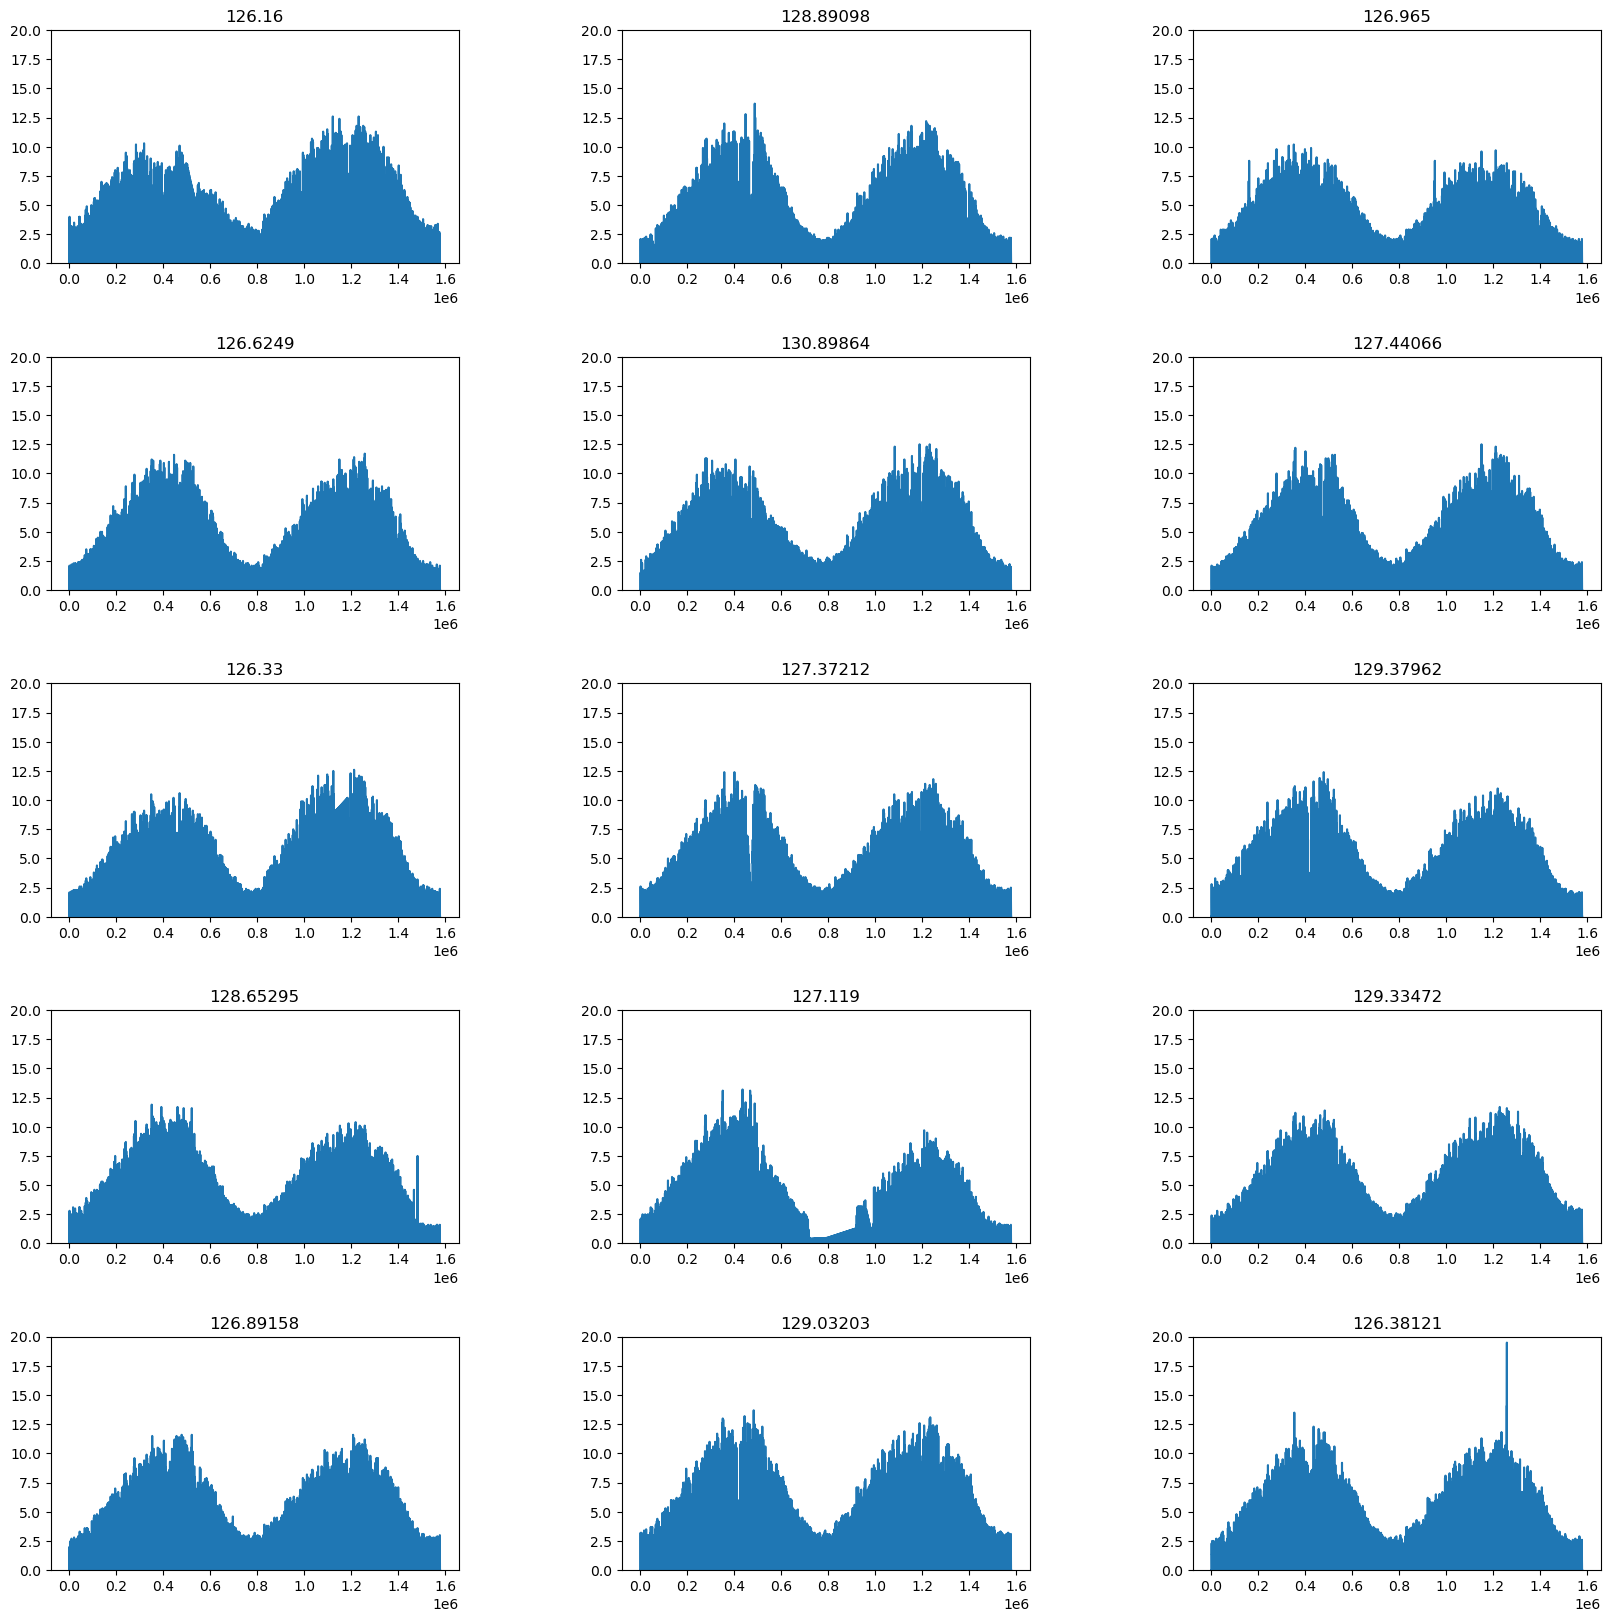

In [16]:
gp = plt.figure(figsize=(20,20))  # figure 생성
gp.subplots_adjust(wspace=0.4, hspace=0.4)  # figure 설정
    
for i in range(1,16):
    ax = gp.add_subplot(5, 3, i)
    ax.set_title(f'{dff_stn[i-1].iloc[1,5]}')
    plt.plot(dff_stn[i-1]['uv'])
    plt.ylim(0, 20)

C:\Users\JAE\AppData\Local\Temp\ipykernel_18524\2842431520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stn[i-1]['uv'].iloc[:] = dff_stn[i-1]['uv'].iloc[:]


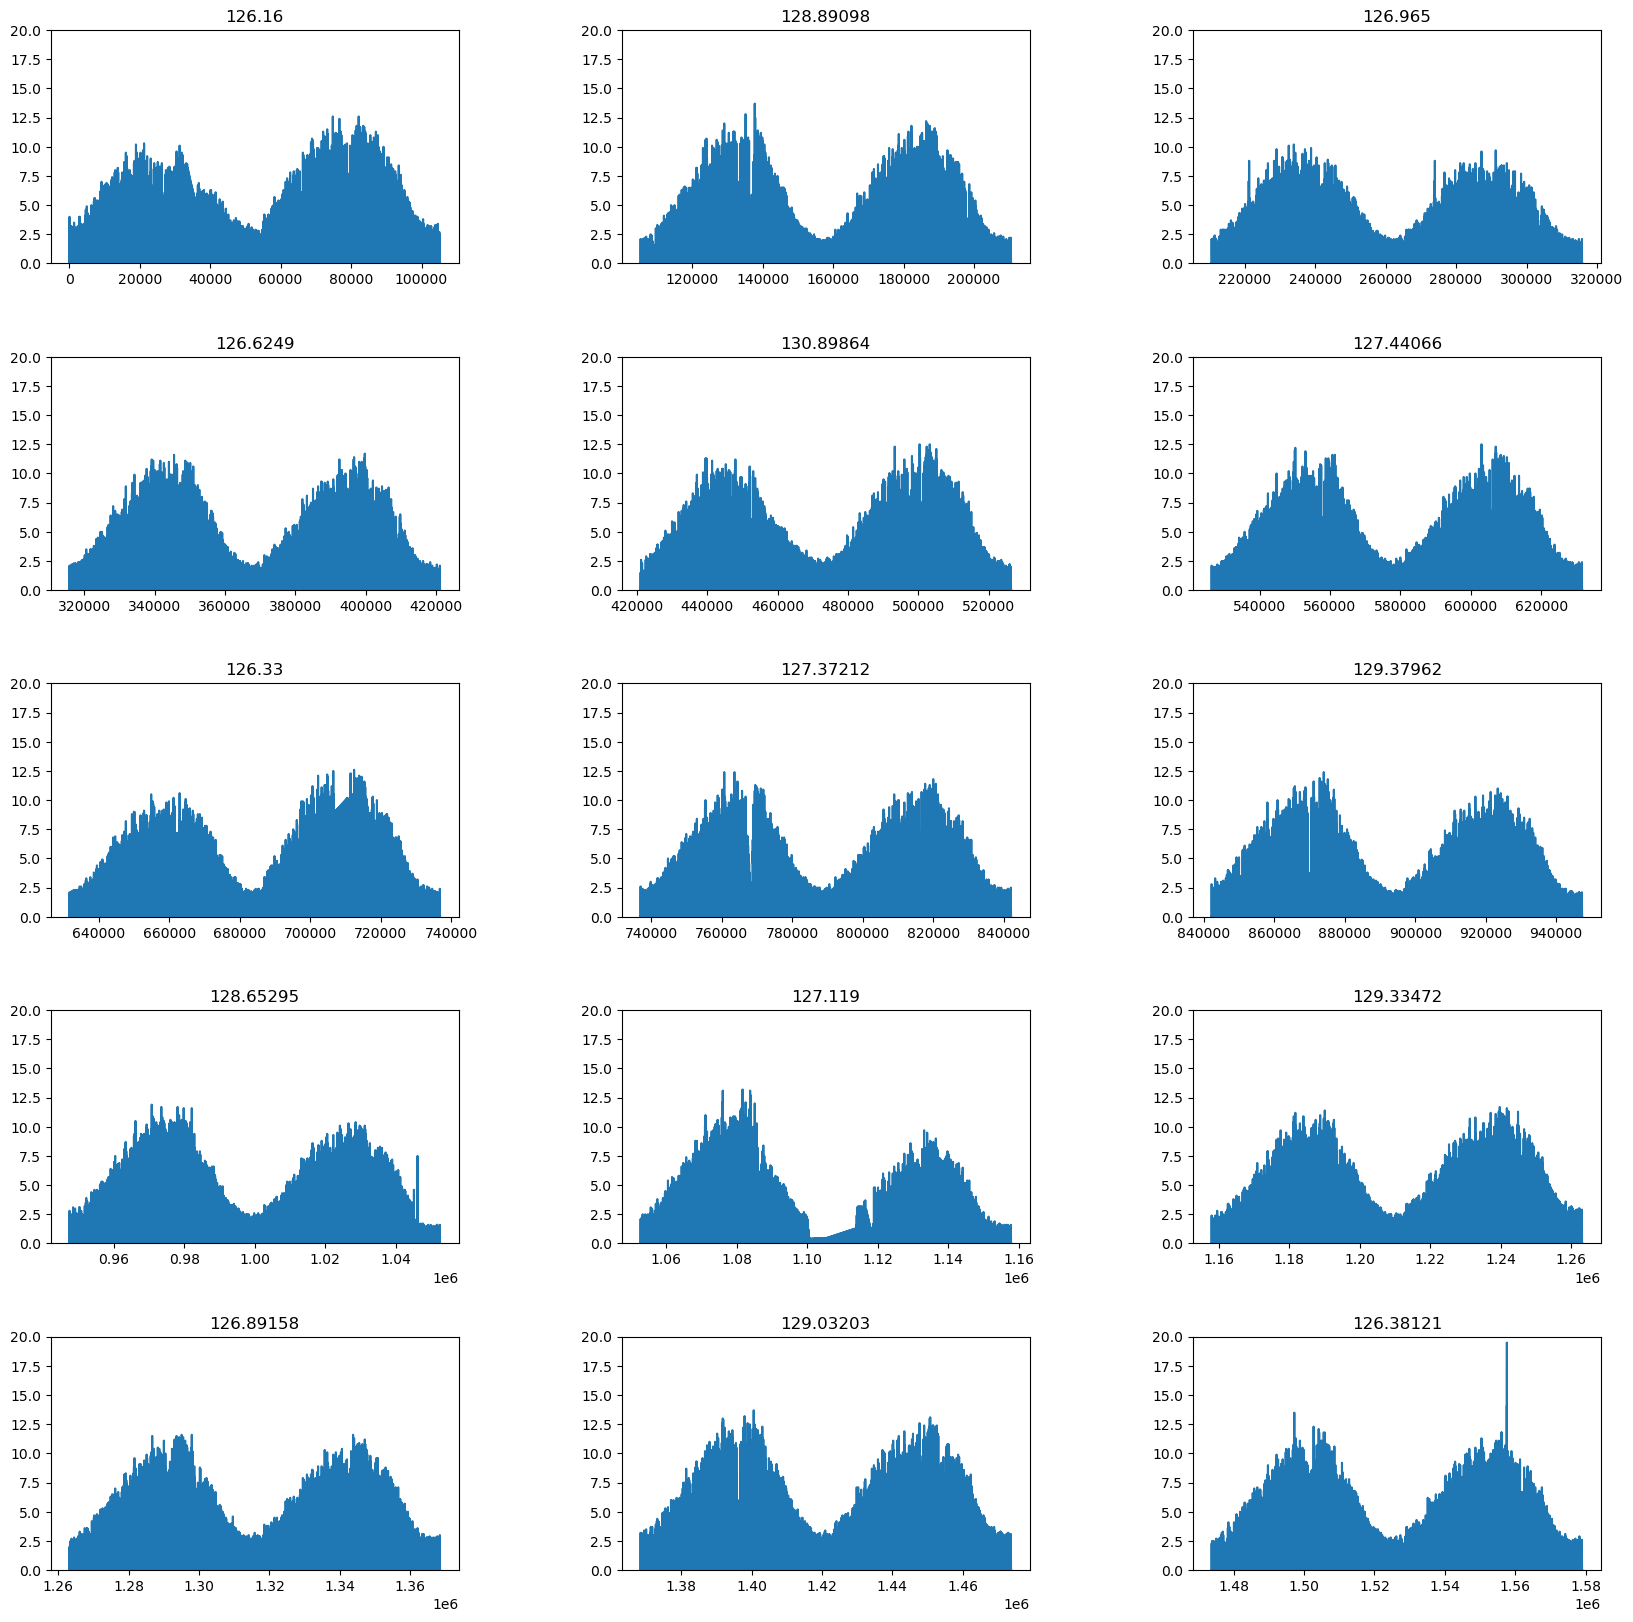

In [19]:
gp = plt.figure(figsize=(20,20))  # figure 생성
gp.subplots_adjust(wspace=0.4, hspace=0.4)  # figure 설정
    
for i in range(1,16):
    df_stn[i-1]['uv'].iloc[:] = dff_stn[i-1]['uv'].iloc[:] #값 대체
    ax = gp.add_subplot(5, 3, i)
    ax.set_title(f'{df_stn[i-1].iloc[1,1]}')
    plt.plot(df_stn[i-1]['uv'])
    plt.ylim(0, 20)

In [22]:
for i in range(15):
    df_stn[i].to_csv(f'찐결측처리데이터\stn{i}.csv')

In [25]:
for i in range(15):
    filename = f"찐결측처리데이터\stn{i}.csv"  # 각 데이터프레임 파일 이름
    df = pd.read_csv(filename)  # 파일로부터 데이터프레임 읽기
    combined_df = combined_df.append(df, ignore_index=True)
combined_df

C:\Users\JAE\AppData\Local\Temp\ipykernel_18524\301726448.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\JAE\AppData\Local\Temp\ipykernel_18524\301726448.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\JAE\AppData\Local\Temp\ipykernel_18524\301726448.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\JAE\AppData\Local\Temp\ipykernel_18524\301726448.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df,

,Unnamed: 0,Datetime,lon,lat,uv,band1,band2,band3,band4,band5,...,증기압(hPa),이슬점온도(°C),해면기압(hPa),전운량(10분위),중하층운량(10분위),지면온도(°C),solaraa,해발고도,풍향_cos,풍향_sin
0,0,2020-01-01 00:00:00,126.16000,33.30000,0.0,0.00000,0.00000,0.00000,-0.00075,0.0000,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-75.17963,71,1.000000,-4.898587e-15
1,1,2020-01-01 00:10:00,126.16000,33.30000,0.0,-0.00057,0.00000,0.00119,-0.00015,-0.0003,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-76.67178,71,1.000000,-4.898587e-15
2,2,2020-01-01 00:20:00,126.16000,33.30000,0.0,0.00000,0.00000,-0.00030,0.00030,0.0000,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-77.94722,71,1.000000,-4.898587e-15
3,3,2020-01-01 00:30:00,126.16000,33.30000,0.0,-0.00057,0.00000,-0.00030,0.00030,-0.0006,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-78.93011,71,1.000000,-4.898587e-15
4,4,2020-01-01 00:40:00,126.16000,33.30000,0.0,-0.00113,-0.00057,-0.00119,-0.00030,-0.0003,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-79.53722,71,1.000000,-4.898587e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578955,1578955,2021-12-31 23:10:00,126.38121,34.81689,0.0,-0.00057,0.00000,-0.00089,-0.00015,-0.0003,...,3.3,-8.0,1032.8,6.0,5.0,-0.8,-65.69170,45,0.173648,-9.848078e-01
1578956,1578956,2021-12-31 23:20:00,126.38121,34.81689,0.0,0.00000,0.00000,-0.00149,0.00015,0.0000,...,3.3,-8.0,1032.8,6.0,5.0,-0.8,-67.56294,45,0.173648,-9.848078e-01
1578957,1578957,2021-12-31 23:30:00,126.38121,34.81689,0.0,0.00000,0.00000,0.00000,0.00030,-0.0003,...,3.3,-8.0,1032.8,6.0,5.0,-0.8,-69.37752,45,0.173648,-9.848078e-01
1578958,1578958,2021-12-31 23:40:00,126.38121,34.81689,0.0,-0.00057,0.00000,-0.00030,-0.00030,-0.0003,...,3.3,-8.0,1032.8,6.0,5.0,-0.8,-71.11812,45,0.173648,-9.848078e-01


In [26]:
combined_df = combined_df.iloc[:,1:]
combined_df

,Datetime,lon,lat,uv,band1,band2,band3,band4,band5,band6,...,증기압(hPa),이슬점온도(°C),해면기압(hPa),전운량(10분위),중하층운량(10분위),지면온도(°C),solaraa,해발고도,풍향_cos,풍향_sin
0,2020-01-01 00:00:00,126.16000,33.30000,0.0,0.00000,0.00000,0.00000,-0.00075,0.0000,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-75.17963,71,1.000000,-4.898587e-15
1,2020-01-01 00:10:00,126.16000,33.30000,0.0,-0.00057,0.00000,0.00119,-0.00015,-0.0003,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-76.67178,71,1.000000,-4.898587e-15
2,2020-01-01 00:20:00,126.16000,33.30000,0.0,0.00000,0.00000,-0.00030,0.00030,0.0000,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-77.94722,71,1.000000,-4.898587e-15
3,2020-01-01 00:30:00,126.16000,33.30000,0.0,-0.00057,0.00000,-0.00030,0.00030,-0.0006,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-78.93011,71,1.000000,-4.898587e-15
4,2020-01-01 00:40:00,126.16000,33.30000,0.0,-0.00113,-0.00057,-0.00119,-0.00030,-0.0003,-0.00065,...,5.2,-2.1,1032.2,9.0,9.0,3.2,-79.53722,71,1.000000,-4.898587e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578955,2021-12-31 23:10:00,126.38121,34.81689,0.0,-0.00057,0.00000,-0.00089,-0.00015,-0.0003,-0.00065,...,3.3,-8.0,1032.8,6.0,5.0,-0.8,-65.69170,45,0.173648,-9.848078e-01
1578956,2021-12-31 23:20:00,126.38121,34.81689,0.0,0.00000,0.00000,-0.00149,0.00015,0.0000,-0.00065,...,3.3,-8.0,1032.8,6.0,5.0,-0.8,-67.56294,45,0.173648,-9.848078e-01
1578957,2021-12-31 23:30:00,126.38121,34.81689,0.0,0.00000,0.00000,0.00000,0.00030,-0.0003,0.00000,...,3.3,-8.0,1032.8,6.0,5.0,-0.8,-69.37752,45,0.173648,-9.848078e-01
1578958,2021-12-31 23:40:00,126.38121,34.81689,0.0,-0.00057,0.00000,-0.00030,-0.00030,-0.0003,0.00000,...,3.3,-8.0,1032.8,6.0,5.0,-0.8,-71.11812,45,0.173648,-9.848078e-01


In [27]:
combined_df.to_csv(f'찐결측처리데이터\combined_df.csv')